# Iris dataset (analysis, visualization, preprocssing, modeling)

The purpose of this project is to analyize and understand the Iris dataset, Also, construct predictive models using different machine learning algorithms and metrics.

Our target is the flower species type, a discrete value which means we will use classification algorithms in our model

Models used : KNeighborsClassifier, RandomForestClassifier, XGBClassifier, MLPClassifier
metrics: precision, recall, accuracy

In [1]:
import warnings
warnings.filterwarnings('ignore') # hide warnings

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, make_scorer, f1_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (10, 8) 

## Explanatory Data Analysis (EDA)
First part of the notebook will be about analyzing and visualizing our data to build an intuition about the dataset we have

In [3]:
col=['sepal_length','sepal_width','petal_length','petal_width','type']
iris=pd.read_csv("Dataset\iris_data.csv",names=col)

In [4]:
print("First five rows")
print(iris.head())
print("*********")
print("columns",iris.columns)
print("*********")
print("shape:",iris.shape)
print("*********")
print("Size:",iris.size)
print("*********")
print("no of samples available for each type") 
print(iris["type"].value_counts())
print("*********")
print(iris.describe())

First five rows
   sepal_length  sepal_width  petal_length  petal_width         type
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
*********
columns Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'type'], dtype='object')
*********
shape: (150, 5)
*********
Size: 750
*********
no of samples available for each type
Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: type, dtype: int64
*********
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000    

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
type            150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


###  Statical summary of the features

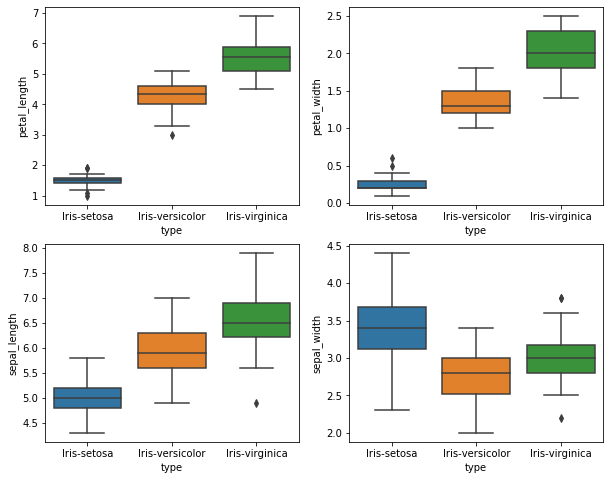

In [6]:
plt.subplot(2,2,1)
sns.boxplot(x='type',y='petal_length',data=iris)
plt.subplot(2,2,2)
sns.boxplot(x='type',y='petal_width',data=iris)
plt.subplot(2,2,3)
sns.boxplot(x='type',y='sepal_length',data=iris)
plt.subplot(2,2,4)
sns.boxplot(x='type',y='sepal_width',data=iris)

### Distribution of the features, relationships between features

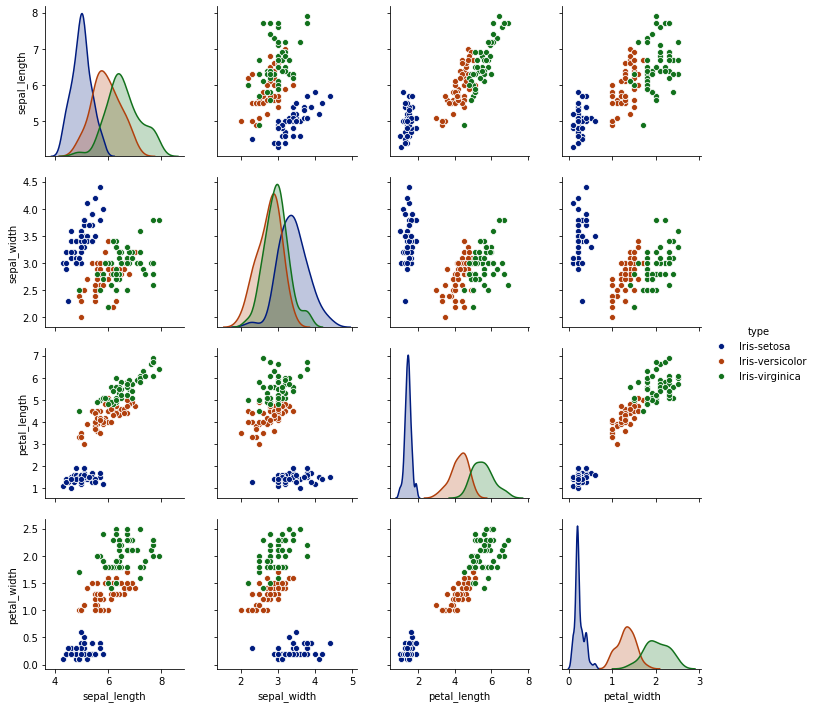

In [7]:
sns.pairplot(iris,hue='type',palette='dark')

### Correlation between features

(4.0, 0.0)

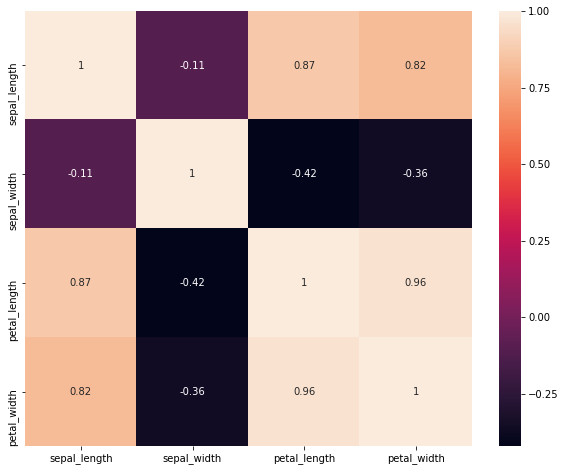

In [8]:
ax = sns.heatmap(iris.corr(), annot=True) 
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

## Data preprocessing

In [9]:
# Dividing data into features and labels
feature_columns = ['petal_length', 'sepal_length','sepal_width','petal_width']
X = iris[feature_columns].values
y = iris['type'].values 

In [10]:
# scaling 
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [11]:
# Label encoding
#Iris-setosa -> 0, Iris-versicolor -> 1, Iris-virginica -> 2
label_encoder = preprocessing.LabelEncoder()
y= label_encoder.fit_transform(y)

In [12]:
# splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

Try our models and run a cross-validated grid search on each one to find the best parameters, then save the best estimator in our models dictionary, so we can test them on our test data set later.

In [13]:
n_folds = 5
scorer = {'acc': 'accuracy',
          'prec': 'precision_macro',
         'rec': 'recall_macro'}
# Focus on the recall score
refit = 'acc'
models = {}
fit_times = {}

## KNeighborsClassifier

In [14]:
# experimenting with different k values using cross-validation for parameter tuning
k_range = list(range(1,30,3))
grid_params = {'n_neighbors': k_range,
               'p': [1, 2, 5],
}

grid_knn = GridSearchCV(
      KNeighborsClassifier(),
      grid_params,
      cv=n_folds,
      scoring=scorer, 
      refit=refit,
      iid=False, 
      n_jobs=-1,
     return_train_score=True
)

grid_knn.fit(X_train,y_train)
models['KNeighborsClassifier'] = grid_knn
best_estimator=grid_knn
fit_times["KNeighborsClassifier"] = grid_knn.cv_results_["mean_fit_time"].mean()*1000
print(best_estimator)
print(grid_knn.cv_results_["mean_fit_time"].mean()*1000)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid=False, n_jobs=-1,
             param_grid={'n_neighbors': [1, 4, 7, 10, 13, 16, 19, 22, 25, 28],
                         'p': [1, 2, 5]},
             pre_dispatch='2*n_jobs', refit='acc', return_train_score=True,
             scoring={'acc': 'accuracy', 'prec': 'precision_macro',
                      'rec': 'recall_macro'},
             verbose=0)
1.036957105000814


In [15]:
results_KNN = pd.DataFrame(grid_knn.cv_results_['params'])
results_KNN['test_score'] = grid_knn.cv_results_['mean_test_acc']
results_KNN['metric'] = results_KNN['p'].replace([1,2,5], ["Manhattan", "Euclidean", "Minkowski"])
results_KNN.sort_values(by='test_score',ascending=False).head(10)

,n_neighbors,p,test_score,metric
1,1,2,0.923839,Euclidean
10,10,2,0.922601,Euclidean
0,1,1,0.913839,Manhattan
6,7,1,0.913839,Manhattan
7,7,2,0.913127,Euclidean
9,10,1,0.903839,Manhattan
4,4,2,0.903127,Euclidean
8,7,5,0.901889,Minkowski
5,4,5,0.891362,Minkowski
2,1,5,0.890310,Minkowski


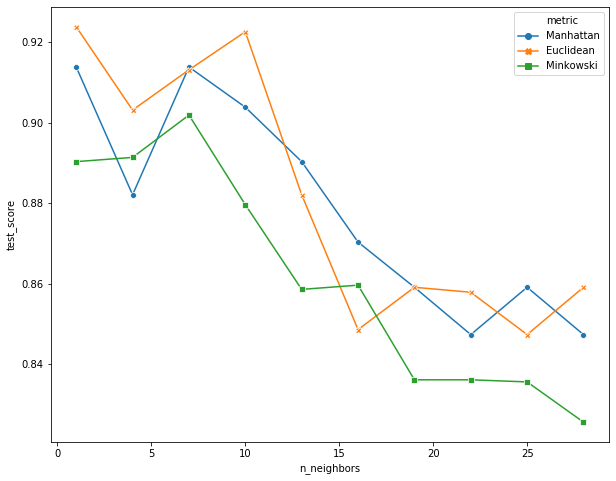

In [16]:
sns.lineplot(data = results_KNN, x='n_neighbors',y='test_score',hue='metric', style="metric", markers=True, dashes=False)

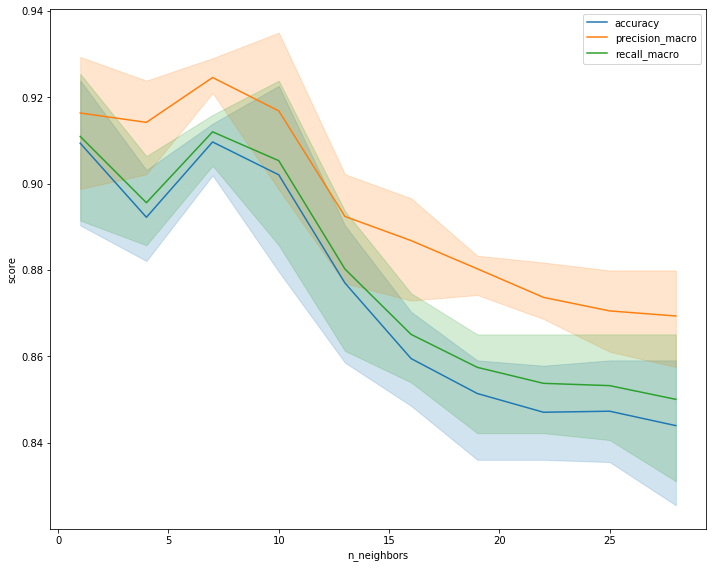

In [17]:
data = pd.DataFrame(grid_knn.cv_results_)
for score in scorer.items():
    ax = sns.lineplot(data=data, x='param_n_neighbors', y='mean_test_{}'.format(score[0]),
                      label=score[1])
ax.set_xlabel('n_neighbors')
ax.set_ylabel('score')
ax.figure.tight_layout()
#ax.figure.savefig("Dataset/bc_logic_reg_lines_L1.png", dpi=200)

# RandomForestClassifier

In [18]:
rf_params = { 
    'n_estimators': [10, 150, 3],
    'max_depth' : [1,2,3,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

grid_rf = GridSearchCV(
      RandomForestClassifier(),
      rf_params,
      cv=n_folds,
      scoring=scorer, 
      refit=refit,
      iid=False, 
      n_jobs=-1,
     return_train_score=True
)

grid_rf.fit(X_train,y_train)
models['RandomForestClassifier'] = grid_rf
fit_times["RandomForestClassifier"] = grid_rf.cv_results_["mean_fit_time"].mean()*1000
print(best_estimator)
print(grid_rf.cv_results_["mean_fit_time"].mean()*1000)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid=False, n_jobs=-1,
             param_grid={'n_neighbors': [1, 4, 7, 10, 13, 16, 19, 22, 25, 28],
                         'p': [1, 2, 5]},
             pre_dispatch='2*n_jobs', refit='acc', return_train_score=True,
             scoring={'acc': 'accuracy', 'prec': 'precision_macro',
                      'rec': 'recall_macro'},
             verbose=0)
98.75548283259073


In [19]:
results_rf = pd.DataFrame(grid_rf.cv_results_['params'])
results_rf['test_score'] = grid_rf.cv_results_['mean_test_acc']
results_rf['criterion'] = results_rf['criterion']
results_rf.sort_values(by='test_score',ascending=False).head(10)

,criterion,max_depth,n_estimators,test_score
31,entropy,3,150,0.935604
4,gini,2,150,0.935604
37,entropy,5,150,0.925604
22,gini,8,150,0.925604
40,entropy,6,150,0.925604
43,entropy,7,150,0.925604
35,entropy,4,3,0.925604
10,gini,4,150,0.925604
14,gini,5,3,0.924892
18,gini,7,10,0.923839


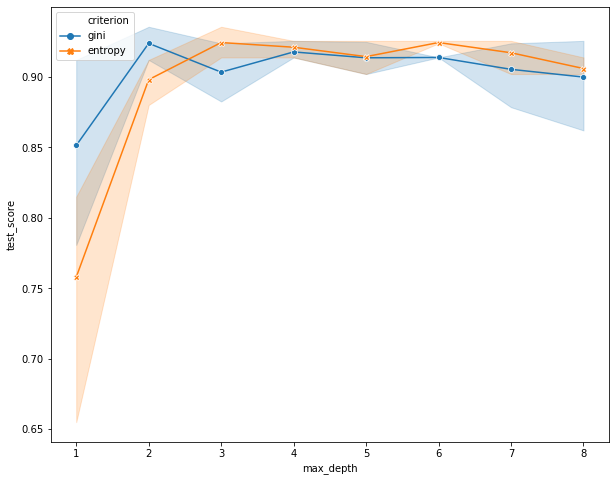

In [20]:
sns.lineplot(data = results_rf, x='max_depth',y='test_score',hue='criterion', style="criterion", markers=True, dashes=False)

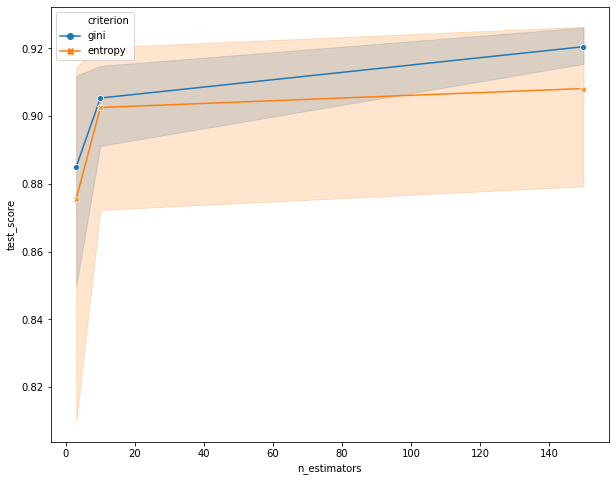

In [21]:
sns.lineplot(data = results_rf, x='n_estimators',y='test_score',hue='criterion', style="criterion", markers=True, dashes=False)

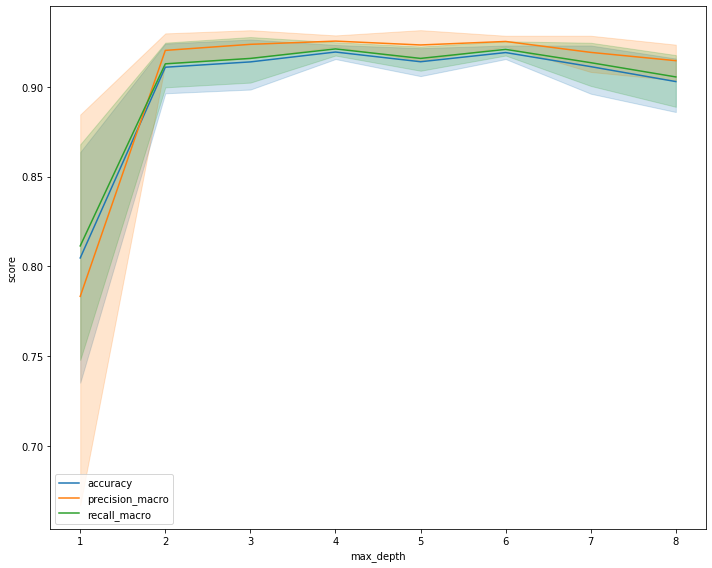

In [22]:
data = pd.DataFrame(grid_rf.cv_results_)
for score in scorer.items():
    ax = sns.lineplot(data=data, x='param_max_depth', y='mean_test_{}'.format(score[0]),
                      label=score[1])
ax.set_xlabel('max_depth')
ax.set_ylabel('score')
ax.figure.tight_layout()

In [23]:
iris.columns[:4]

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

Text(0.5, 1.0, 'Feature importance (RandomForestClassifier')

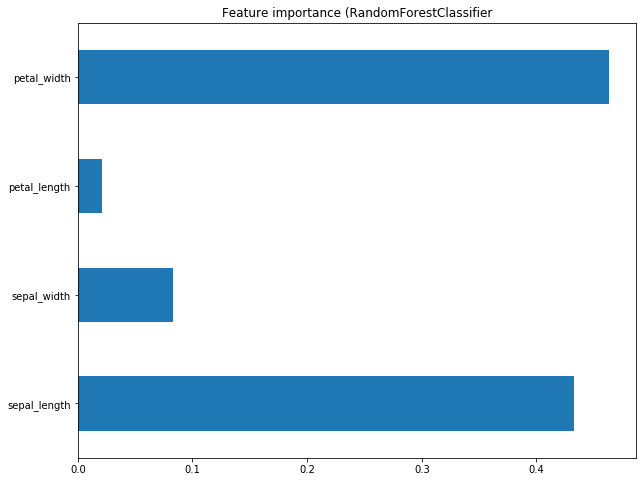

In [24]:
importances=pd.Series(grid_rf.best_estimator_.feature_importances_,index=iris.columns[:4])
importances.plot(kind='barh')
plt.title('Feature importance (RandomForestClassifier')

## XGBClassifier

In [25]:
xgb_params = { 
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1],
}
grid_xgb = GridSearchCV(XGBClassifier(), xgb_params, cv=n_folds,
      scoring=scorer, 
      refit=refit,
      iid=False, 
      n_jobs=-1,
     return_train_score=True
)
grid_xgb.fit(X_train,y_train)
models['XGBClassifier'] = grid_xgb
best_estimator = grid_xgb.best_estimator_
fit_times["XGBClassifier"] = grid_xgb.cv_results_["mean_fit_time"].mean()*1000
print(best_estimator)
print(grid_xgb.cv_results_["mean_fit_time"].mean()*1000)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
149.66714620590207


In [26]:
results_xgb = pd.DataFrame(grid_xgb.cv_results_['params'])
results_xgb['test_score'] = grid_xgb.cv_results_['mean_test_acc']
results_xgb['learning_rate'] = results_xgb['learning_rate']
results_xgb.sort_values(by='test_score',ascending=False).head(10)

,learning_rate,n_estimators,test_score
10,0.0100,100,0.935604
13,0.0100,400,0.935604
12,0.0100,300,0.935604
14,0.0100,500,0.925604
8,0.0010,400,0.923839
11,0.0100,200,0.923839
1,0.0001,200,0.923839
9,0.0010,500,0.923839
0,0.0001,100,0.923839
7,0.0010,300,0.923839


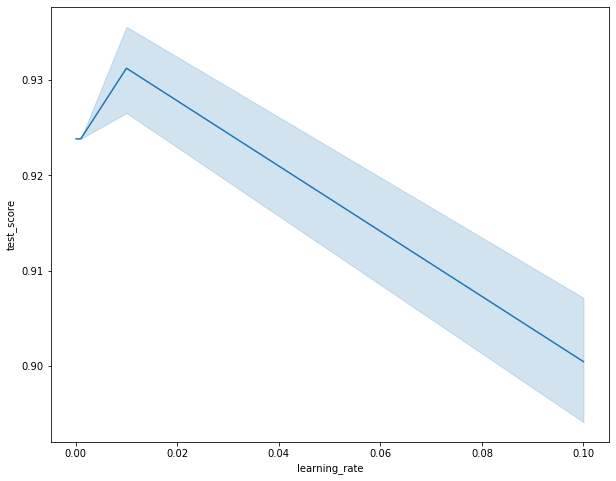

In [27]:
sns.lineplot(data = results_xgb, x='learning_rate',y='test_score', markers=True, dashes=False)

Text(0.5, 1.0, 'Feature importance (XGBClassifier)')

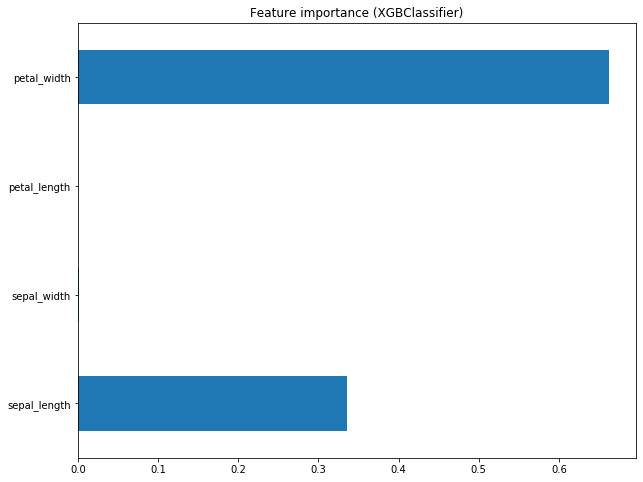

In [28]:
importances=pd.Series(grid_xgb.best_estimator_.feature_importances_,index=iris.columns[:4])
importances.plot(kind='barh')
plt.title('Feature importance (XGBClassifier)')

## MLPClassifier

In [29]:
mlp_params = { 
    'hidden_layer_sizes' : [(3,1), (5,2), (9,4)],
    'activation' : ["logistic", "relu", "identity","tanh"]
}

grid_mlp = GridSearchCV(MLPClassifier(), 
mlp_params, cv=n_folds,
scoring=scorer, 
refit=refit,
iid=False, 
n_jobs=-1,
return_train_score=True)

grid_mlp.fit(X_train,y_train)
models['MLPClassifier'] = grid_mlp
best_estimator = grid_mlp.best_estimator_
fit_times["MLPClassifier"] = grid_mlp.cv_results_["mean_fit_time"].mean()*1000
print(best_estimator)
print(grid_mlp.cv_results_["mean_fit_time"].mean()*1000)

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(9, 4), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
297.1790512402853


In [30]:
results_mlp = pd.DataFrame(grid_mlp.cv_results_['params'])
results_mlp['test_score'] = grid_mlp.cv_results_['mean_test_acc']
results_mlp['activation'] = results_mlp['activation']
results_mlp.sort_values(by='test_score',ascending=False).head(10)

,activation,hidden_layer_sizes,test_score
11,tanh,"(9, 4)",0.912601
8,identity,"(9, 4)",0.840248
7,identity,"(5, 2)",0.738607
5,relu,"(9, 4)",0.679257
10,tanh,"(5, 2)",0.575913
6,identity,"(3, 1)",0.564861
9,tanh,"(3, 1)",0.542570
4,relu,"(5, 2)",0.528019
2,logistic,"(9, 4)",0.465046
1,logistic,"(5, 2)",0.377740


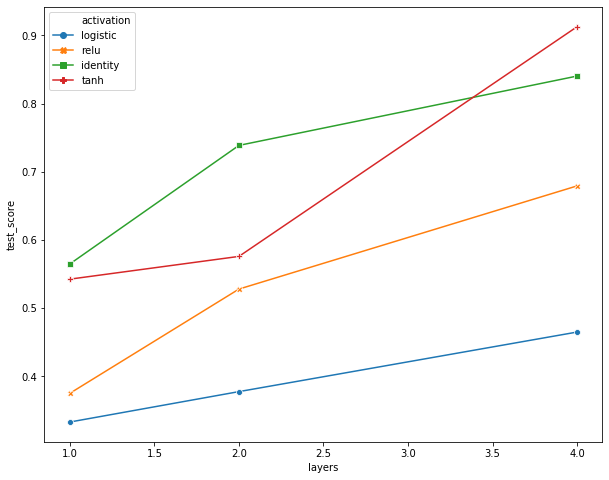

In [31]:
results_mlp['neurons']=list(map(lambda x: x[0], results_mlp['hidden_layer_sizes']))
results_mlp['layers']=list(map(lambda x: x[1], results_mlp['hidden_layer_sizes']))
sns.lineplot(data = results_mlp, x='layers',y='test_score',hue='activation', style="activation", markers=True, dashes=False)

# Model evaluation


Refit accuracy KNeighborsClassifier:0.9667 in 0.000ms

                 precision    recall
Iris_setosa       1.000000  1.000000
Iris_versicolor   0.947368  0.947368
Iris_virginica    0.944444  0.944444
accuracy          0.966667  0.966667
macro avg         0.963938  0.963938
weighted avg      0.966667  0.966667

Refit accuracy RandomForestClassifier:0.9833 in 144.910ms

                 precision    recall
Iris_setosa       1.000000  1.000000
Iris_versicolor   0.950000  1.000000
Iris_virginica    1.000000  0.944444
accuracy          0.983333  0.983333
macro avg         0.983333  0.981481
weighted avg      0.984167  0.983333

Refit accuracy XGBClassifier:      1.0000 in 46.969ms

                 precision  recall
Iris_setosa            1.0     1.0
Iris_versicolor        1.0     1.0
Iris_virginica         1.0     1.0
accuracy               1.0     1.0
macro avg              1.0     1.0
weighted avg           1.0     1.0

Refit accuracy MLPClassifier:      0.7667 in 186.886ms

        

,mean training time (ms)
KNeighborsClassifier,1.036957
RandomForestClassifier,98.755483
XGBClassifier,149.667146
MLPClassifier,297.179051


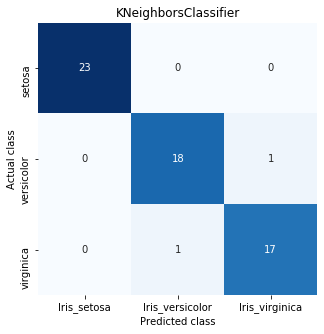

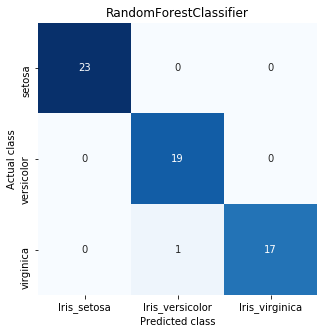

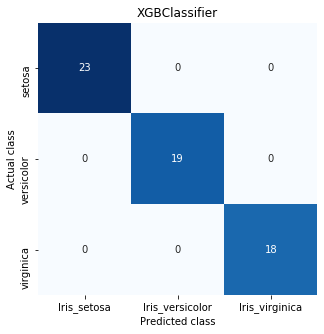

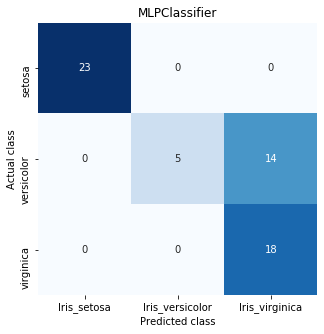

In [32]:
target_names = ['Iris_setosa', 'Iris_versicolor', 'Iris_virginica']
for model, estimator in models.items():
    score = estimator.score(X_test, y_test)
    print('\nRefit accuracy {:20}{:.4f} in {:.3f}ms\n'.format(model + ':', score, estimator.refit_time_ * 1000.))
    y_pred = estimator.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    report=classification_report(y_test,y_pred,target_names=target_names,output_dict=True)
    df = pd.DataFrame(report).transpose()
    print(df.drop(['f1-score', 'support'], axis=1))
    cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['Iris_setosa','Iris_versicolor','Iris_virginica'])
    plt.figure(figsize=(5,5))
    ax=sns.heatmap(cm_df, annot=True,cmap="Blues",cbar=False)
    ax.title.set_text(model)
    plt.xlabel('Predicted class')
    plt.ylabel('Actual class')
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
pd.DataFrame.from_dict(fit_times, orient='index', columns=['mean training time (ms)'])